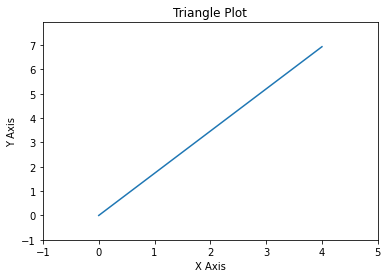

In [276]:
import matplotlib.pyplot as plt
import numpy as np

# Define the coordinates of the vertices of the triangle
x = [0, 4]
y = [0, 4*np.sqrt(3)]

# Plot the triangle using Matplotlib
fig, ax = plt.subplots()
ax.plot(x, y)

# Set the axis limits and labels
ax.set_xlim([min(x)-1, max(x)+1])
ax.set_ylim([min(y)-1, max(y)+1])
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_title('Triangle Plot')

# Display the plot
plt.show()


29.999999999999993

-29.999999999999993

29.999999999999993

-29.999999999999993

90.0


C:\Users\aazadkhorasa\AppData\Local\Temp\ipykernel_716\287993234.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  print(np.arctan((y_end-y_start)/(x_end- x_start))*180/np.pi)


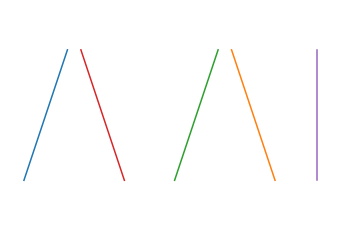

In [101]:

import matplotlib.pyplot as plt
import numpy as np

# Define the lengths and dips for each line
lengths = [6, 6, 6, 6, 3]
dips = [30, 150, 30, 150, 90]

# Convert dips to radians
dips = np.radians(dips)

# Define the starting points for each line
starts = [(2,1), (32,1), (20,1), (14,1), (37,1)]

# Plot each line as a separate entity
fig, ax = plt.subplots()
for i in range(len(lengths)):
    x_start, y_start = starts[i]
    x_end = x_start + lengths[i]*np.cos(dips[i])
    print()
    y_end = y_start + lengths[i]*np.sin(dips[i])
    print(np.arctan((y_end-y_start)/(x_end- x_start))*180/np.pi)
    ax.plot([x_start, x_end], [y_start, y_end])

# Set the axis limits and labels
ax.set_xlim([0, 40])
ax.set_ylim([0, 5])
#ax.set_title('Five Individual Lines Plot')
plt.axis('off')

# Display the plot
plt.show()

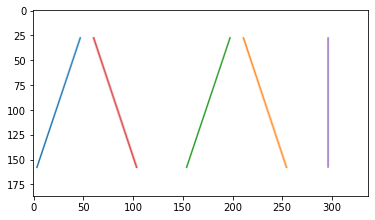

In [339]:
plt.imshow(syntetic, cmap='gray')

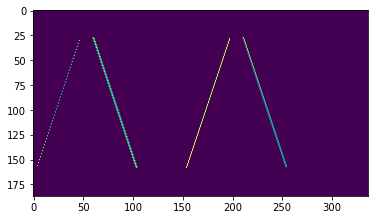

In [441]:
gray = cv2.cvtColor(syntetic, cv2.COLOR_BGR2GRAY)

plt.imshow(1*(1-gray>0.5))

In [396]:
1*(1-gray>0.5)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

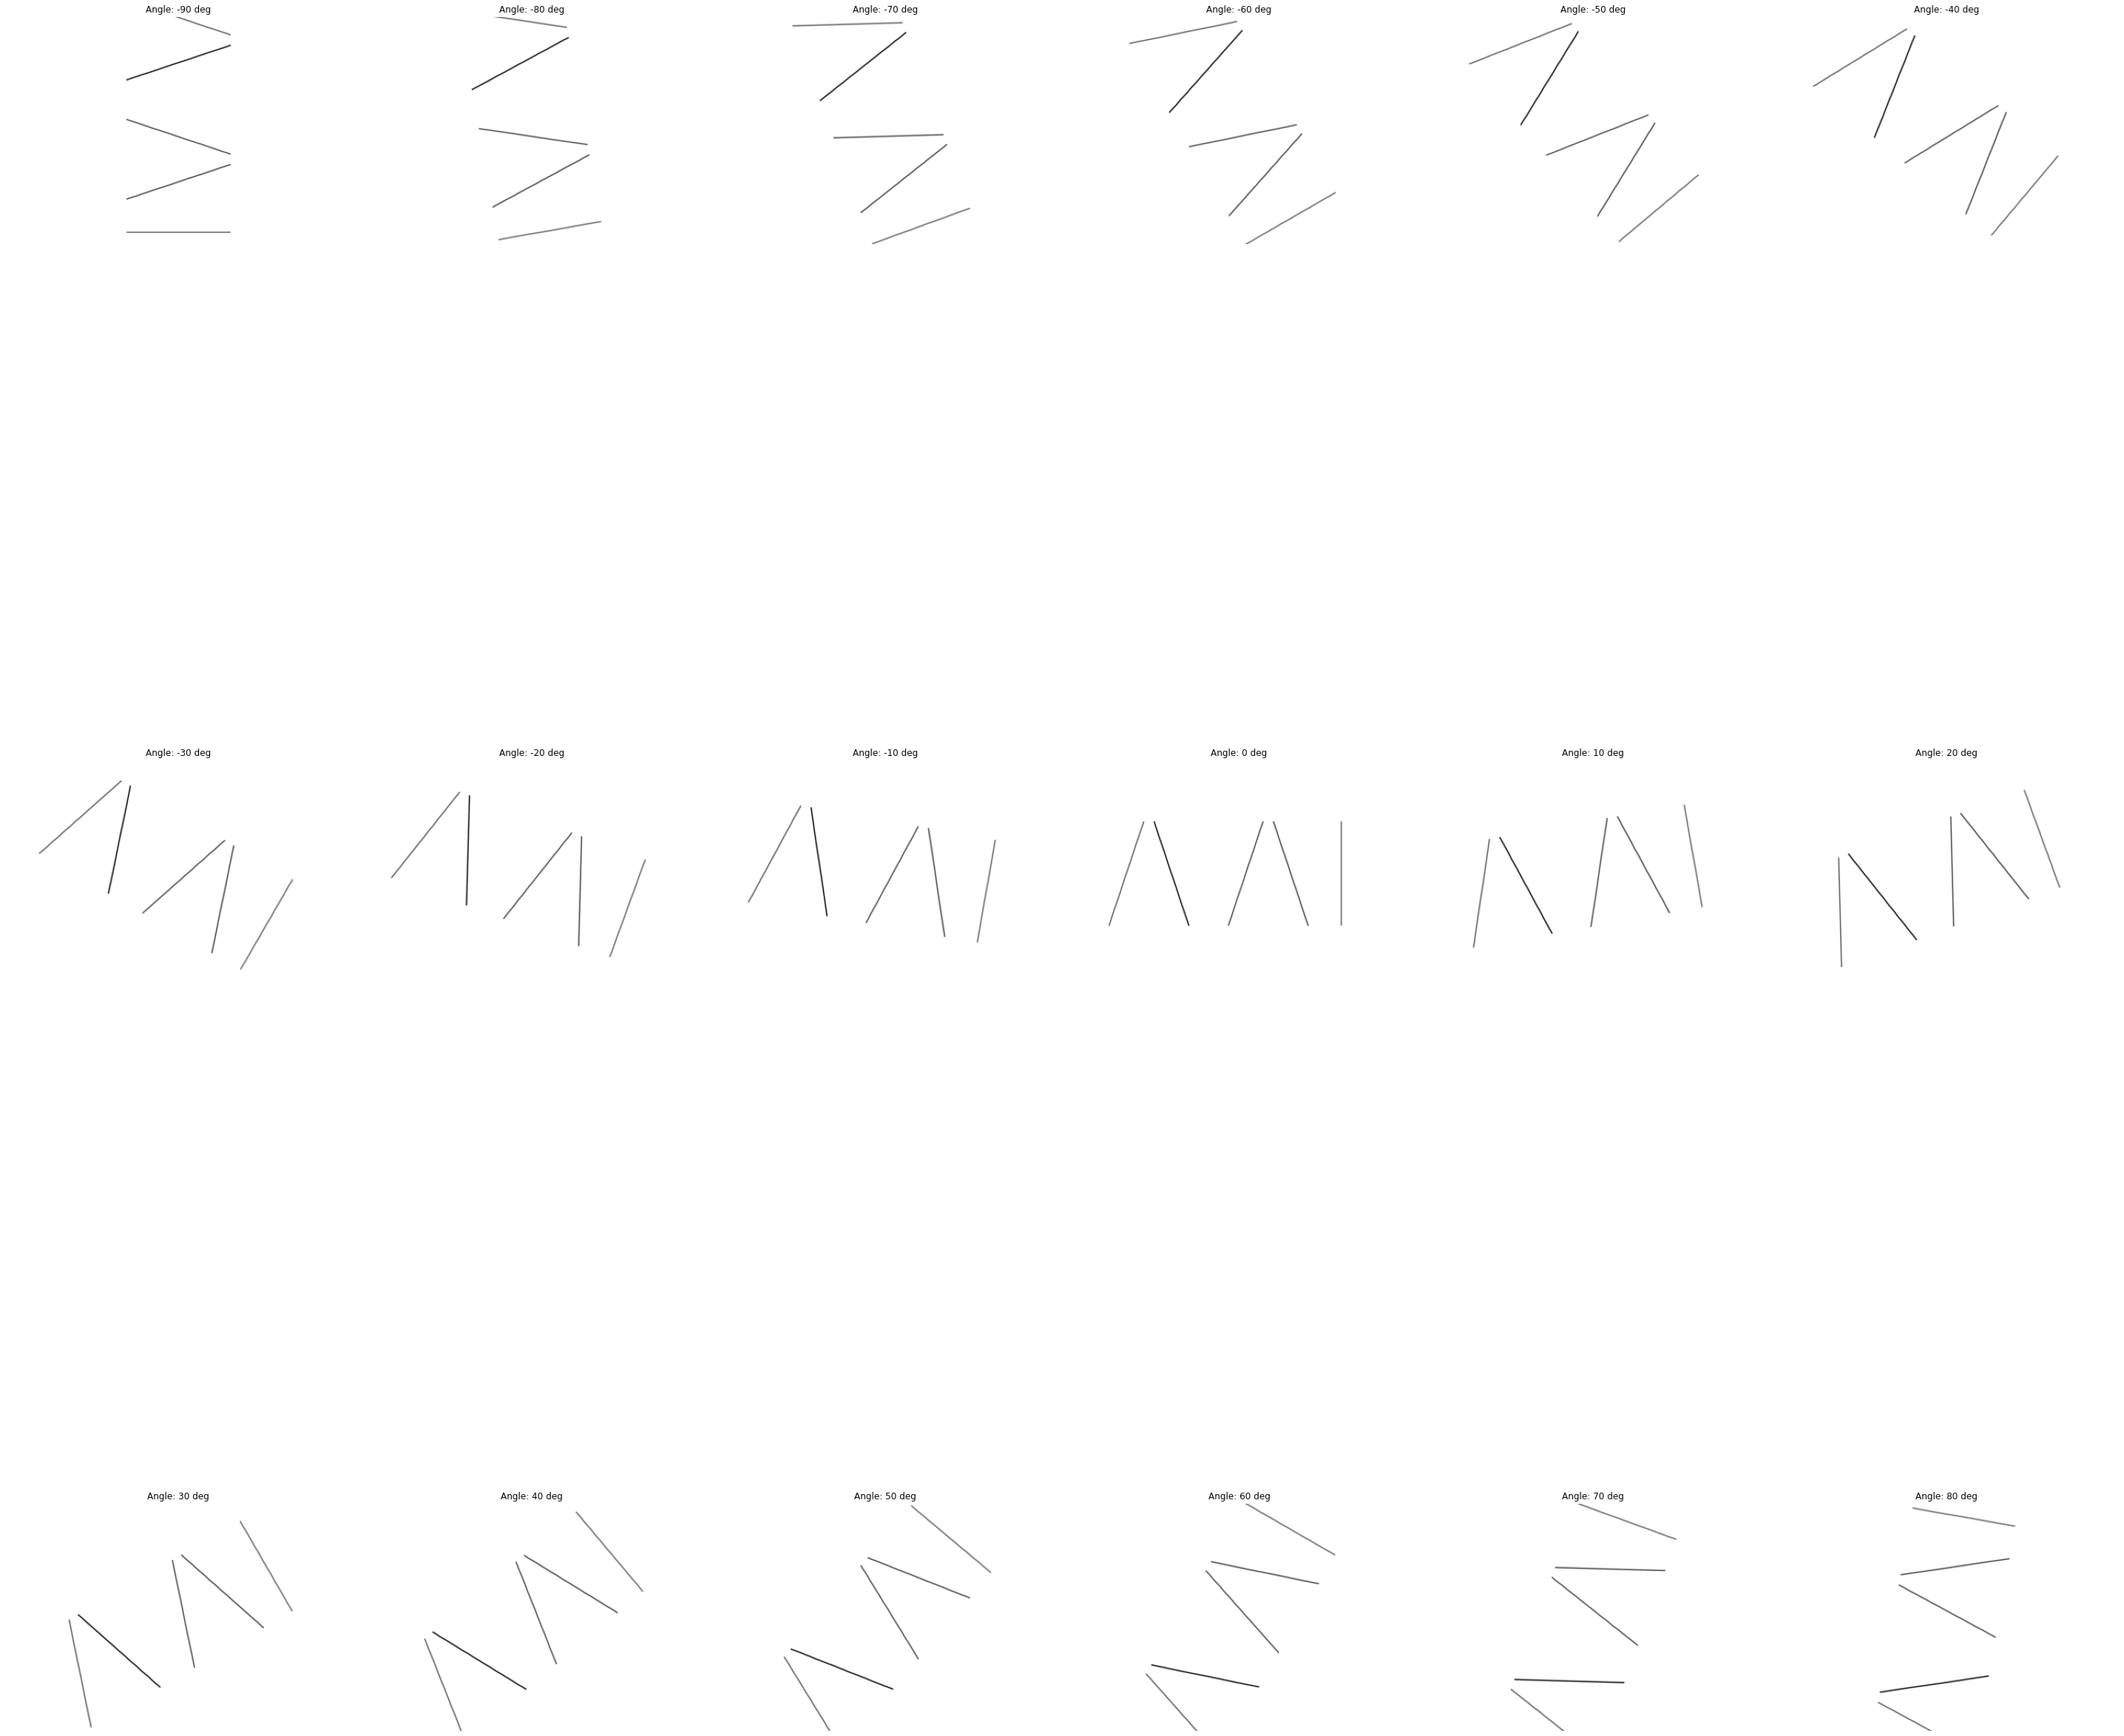

In [423]:
from scipy.ndimage import rotate
angles = range(-90, 90,10)

syntetic = plt.imread('syntetic.png')
gray = cv2.cvtColor(syntetic, cv2.COLOR_BGR2GRAY)

# img = np.pad(1*(1-gray>0.5), 50, constant_values=1)
img = np.pad(gray, 50, constant_values=1)

vmin = np.min(img)
vmax = np.max(img)

# Create a new 600x600 matrix filled with mid gray color
gray = np.ones((600, 600))*0.9

# Create a figure with subplots for each rotation
fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(40, 50), facecolor='white')

# Loop over the angles and rotate the matrix at each angle
for i, angle in enumerate(angles):
    # Rotate the matrix at the current angle
    rotated_matrix = rotate(img, angle, reshape=False, mode='nearest')
    
    # Plot the rotated matrix in the current subplot
    row = i //6
    col = i % 6
    axs[row, col].imshow(rotated_matrix, cmap='gray', vmin=vmin, vmax=vmax)
    axs[row,col].set_title(f'Angle: {angle} deg')
    axs[row,col].axis('off')

plt.tight_layout()
plt.show()

In [426]:
def counter_tile(res_data, dt, dx):
    (t_max,x_max)= res_data.shape
    
    n_patch =(t_max//dt+1)*(x_max//dx+1)
    count = np.zeros((t_max//dt+1, x_max//dx+1))
    n=0
    T=[]
    N=[]
    for i, t in enumerate(range(0, t_max, dt)):
        for j, x in enumerate(range(0, x_max, dx)):
            
            if t_max - t < dt and x_max - x < dx :
                count[i,j]=np.sum(res_data[t_max-dt:t_max , x_max-dx:x_max])/dt/dx*100
            elif x_max - x < dx:
                count[i,j]=np.sum(res_data[t:t+dt, x_max-dx:x_max])/dt/dx*100
            elif t_max - t < dt:
                count[i,j]=np.sum(res_data[t_max-dt:, x:x+dx])/dt/dx*100
            else:
                count[i,j]=np.sum(res_data[t:t+dt:, x:x+dx])/dt/dx*100
            N.append(n)
            n=n+1
    return count


angles = range(-90, 90,10)

vmin = np.min(syntetic)
vmax = np.max(syntetic)

# Create a new 600x600 matrix filled with mid gray color
gray = np.ones((600, 600))*0.9

data_dict = {'direction': [], 'percenatge':[]}

patch_step = 3
data = []
direction = np.arange(-90,90,10)
#` Loop over the angles and rotate the matrix at each angle
for i, angle in enumerate(angles):
    # Rotate the matrix at the current angle
    rotated_matrix = rotate(img, angle, reshape=False, mode='nearest')
    result_count = counter_tile(rotated_matrix, 1, 1)
    st = result_count.shape[1]//2
    th = 0.5
    #here
    rect = 1.*(result_count[:,:st]>th)
    X = patch_detect(rect)

    percentage = round(np.sum(rect)/(rect.shape[0]*rect.shape[1]), 2)
    data_dict['percenatge'].append(percentage)
    data_dict['direction'].append(str(direction[i]))
    
df = pd.DataFrame(data_dict)
df['strength'] = (df['percenatge']-df['percenatge'].min())/(df['percenatge'].max()-df['percenatge'].min())

In [427]:
import plotly.express as px

#fig = px.bar_polar(df, r="percenatge", color="strength", theta="direction")
fig = px.bar_polar(df, r="percenatge", theta="direction", color_discrete_sequence=["red", "blue", "green"])

fig.show()

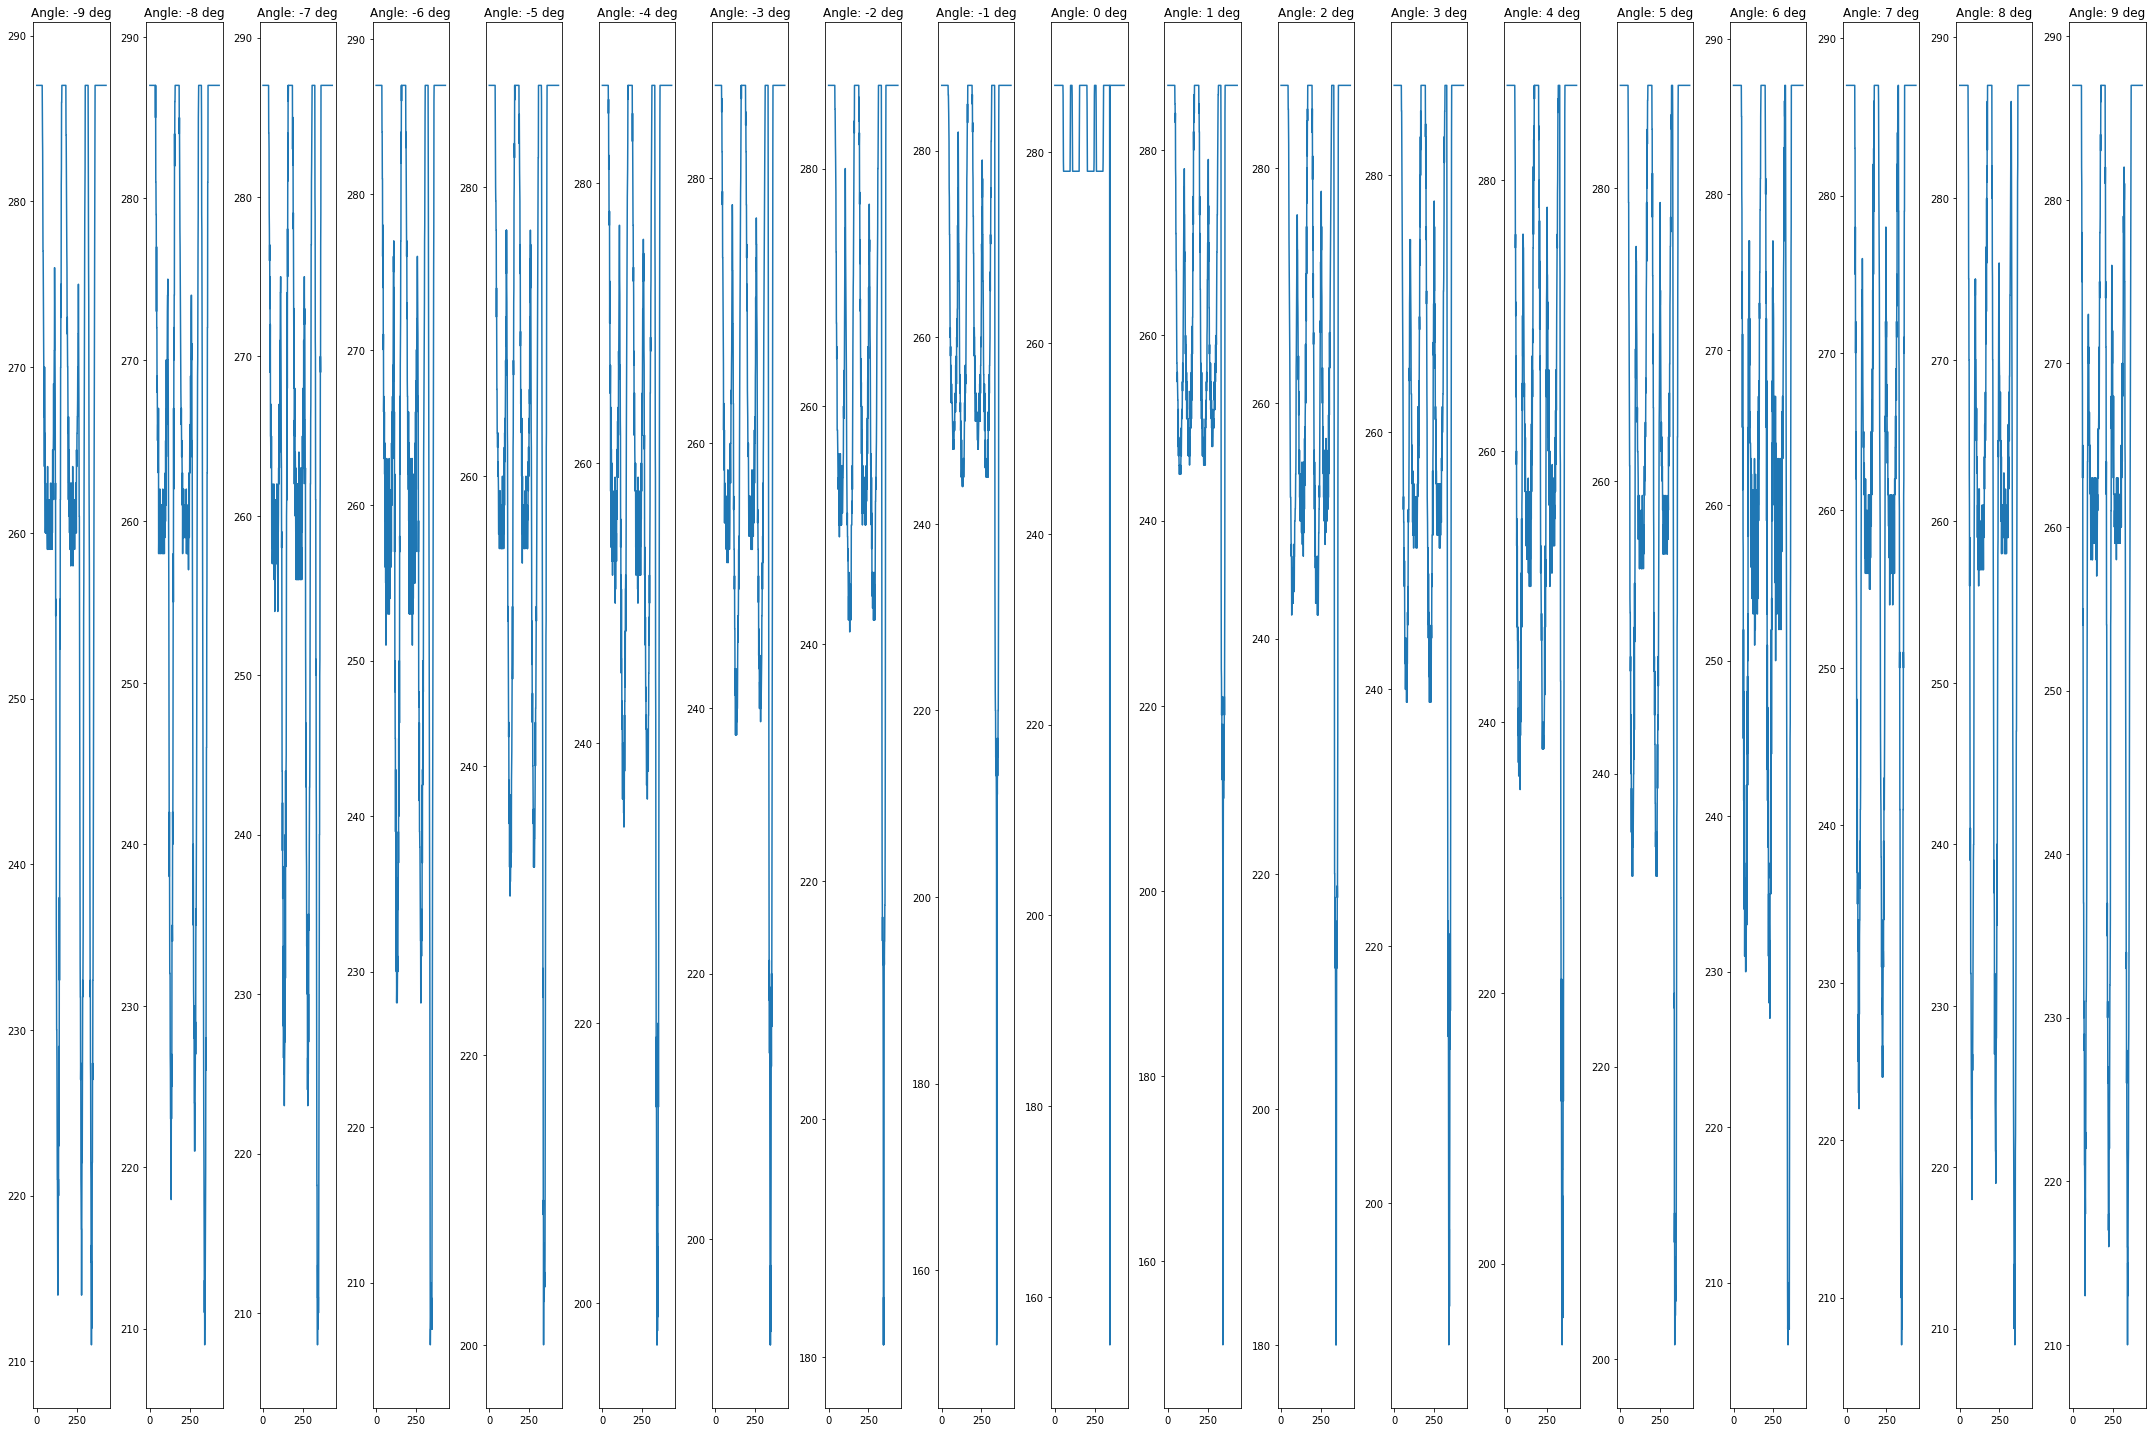

In [438]:
from scipy.ndimage import rotate
import plotly.express as px
import pandas as pd

angles = range(-9, 10,1)

vmin = np.min(syntetic)
vmax = np.max(syntetic)

# Create a new 600x600 matrix filled with mid gray color
gray = np.ones((600, 600))*0.9

# Create a figure with subplots for each rotation
fig, axs = plt.subplots(nrows=1, ncols=19, figsize=(30, 20), facecolor='white')
data_dict = {'direction': [], 'percenatge':[]}

# Loop over the angles and rotate the matrix at each angle
for i, angle in enumerate(angles):
    # Rotate the matrix at the current angle
    rotated_matrix = rotate(img, angle, reshape=False, mode='nearest')
    sum_ = np.sum(rotated_matrix.astype(np.uint8), axis=0)
#     print(data_dict['percenatge'].shape)
    # Plot the rotated matrix in the current subplot
    row = i // 19
    col = i % 19
#     px.bar_polar(pd.DataFrame(data_dict), r="percenatge")
    axs[col].plot(sum_)
    axs[col].set_title(f'Angle: {angle} deg')
#     axs[col].axis('off')

plt.tight_layout()
plt.show()

In [275]:
rotated_matrix.astype(np.uint8).min()

0

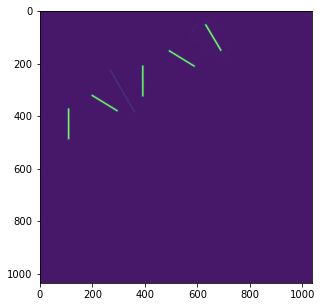

In [77]:
from scipy.ndimage import rotate
rotated_v_el=rotate(img, angle= 30) 
fig = plt.figure(figsize=(5, 5))
plt.imshow(rotated_v_el)

# # Get the dimensions of the matrix and print them
# num_rows = len(rotated_v_el)
# num_cols = len(rotated_v_el[0])
# dimensions = (num_rows, num_cols)
# print(dimensions)
# print(rotated_v_el)

# print(np.linalg.det(rotated_v_el))
# print(np.min(rotated_v_el))

In [78]:
def patch_detect(patch):    
   
    flag = 0
    X = []
    for i in range(patch.shape[0]):
        for j in range(patch.shape[1]):
            if patch[i,j] and not flag:
                flag = 1
                X.append([i, j])
            if patch[i,j:j+1]:
                flag = 0
    return X

C:\Users\aazadkhorasa\AppData\Local\Temp\ipykernel_13052\156005398.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0%}'.format(x) for x in current_values])


[Text(0, 0.0, '0%'),
 Text(0, 0.01, '1%'),
 Text(0, 0.02, '2%'),
 Text(0, 0.03, '3%'),
 Text(0, 0.04, '4%'),
 Text(0, 0.05, '5%'),
 Text(0, 0.06, '6%'),
 Text(0, 0.07, '7%'),
 Text(0, 0.08, '8%')]

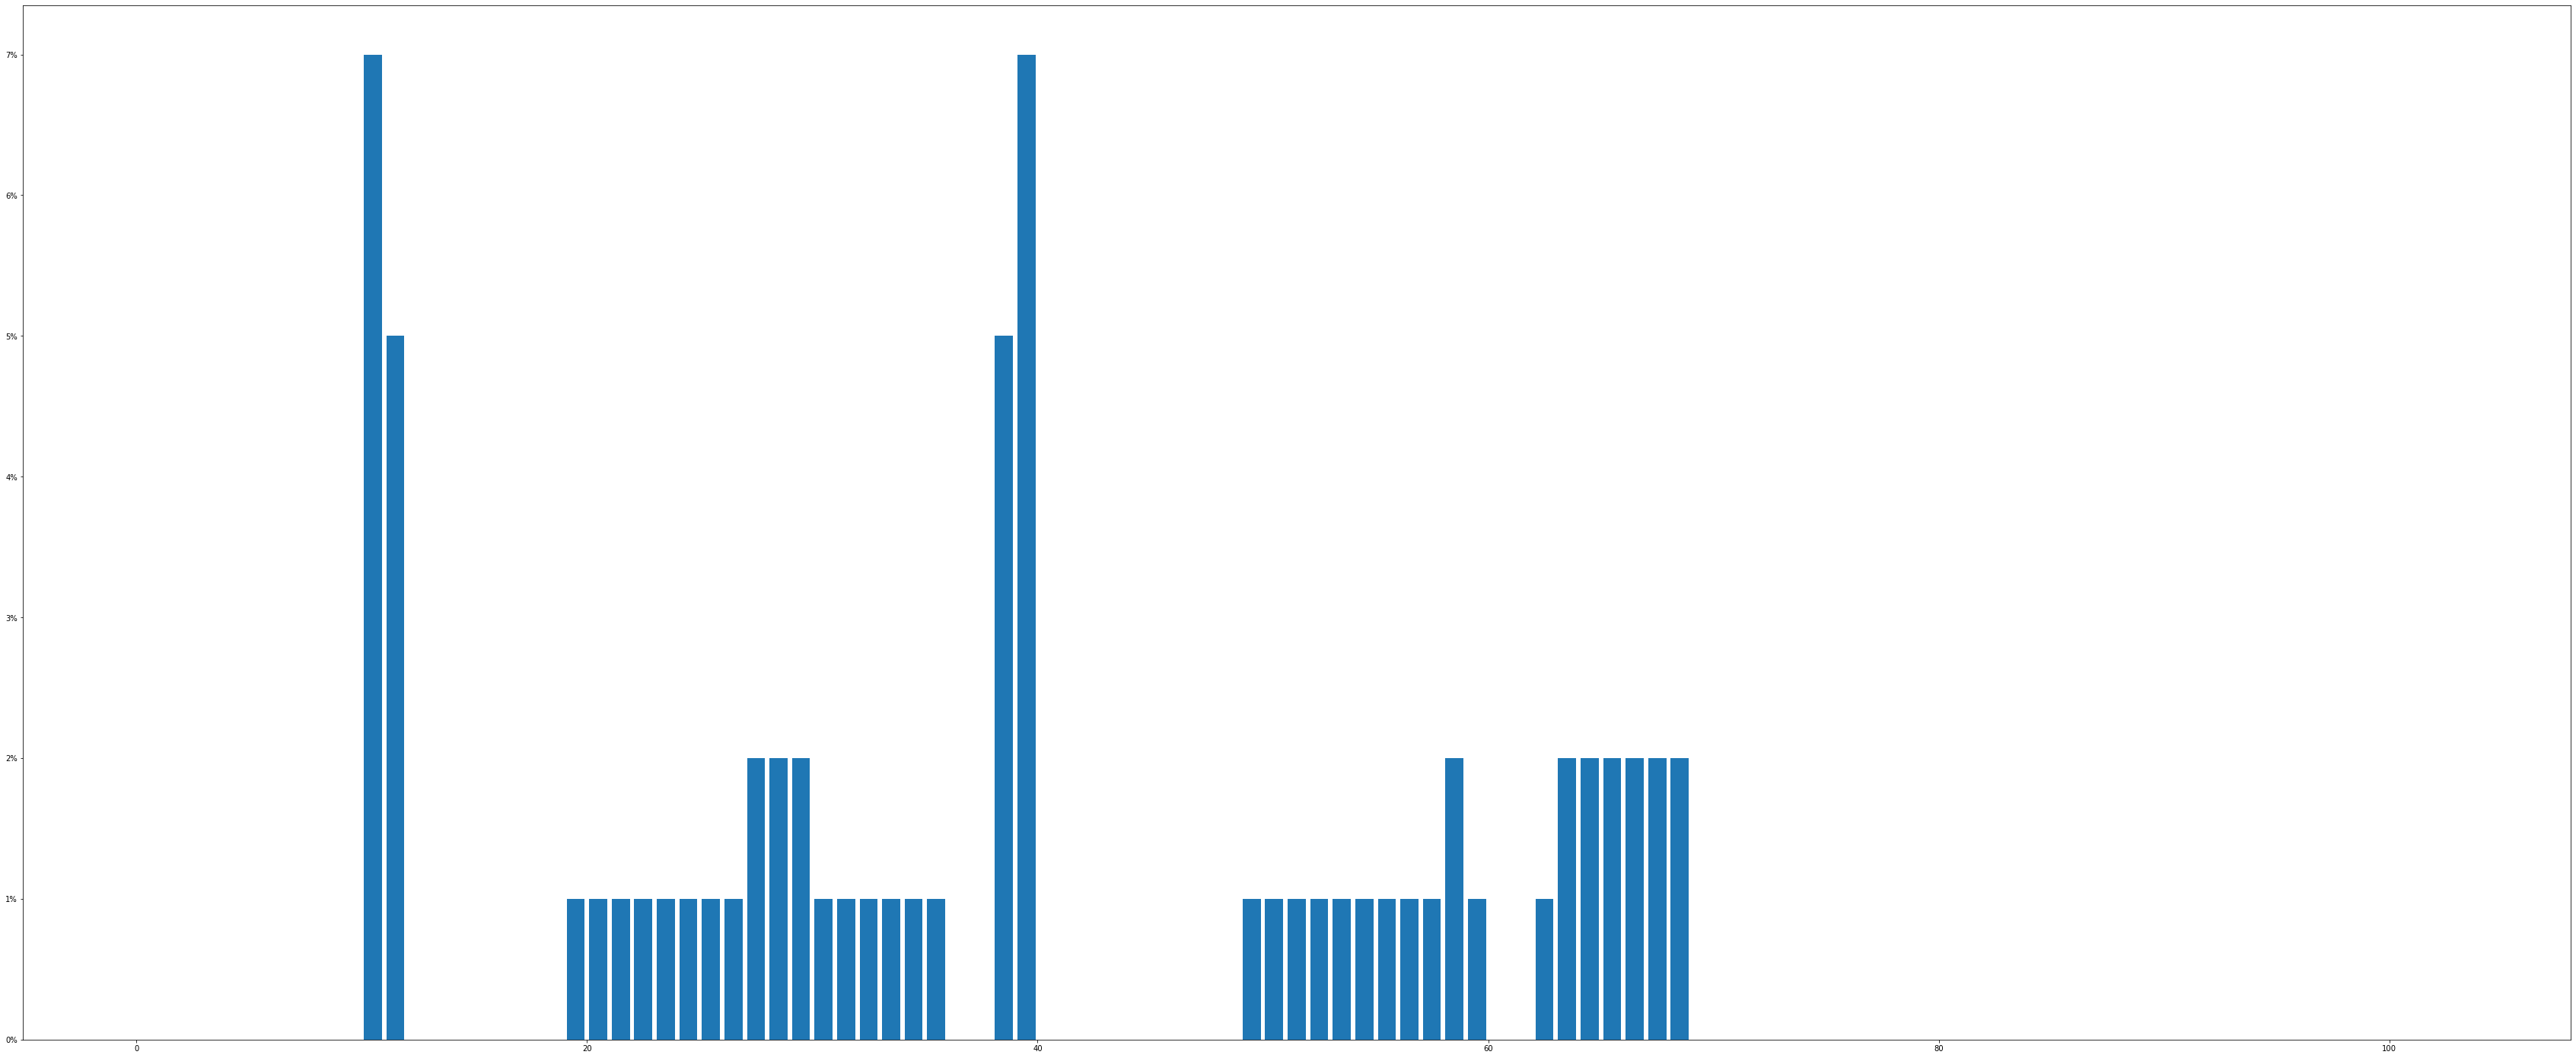

In [79]:
import pandas as pd

data_dict = {'rectangualr number':[],
             'upper':[],
             'lower':[],
             'percenatge':[]}

patch_step = 10
data = []
for i in range(0, rotated_v_el.shape[1]-patch_step+1, patch_step):
    st = list(range(i,i+patch_step))
    th = 0.5
    rect = 1.*(rotated_v_el[:,st]>th)
    X = patch_detect(rect)
    
    percentage = round(np.sum(rect)/(rect.shape[0]*rect.shape[1]), 2)
    if X:
    
        data_dict['rectangualr number'].append(i//patch_step+1)
        data_dict['upper'].append(np.min(np.array(X)[:,0])*8)
        data_dict['lower'].append(np.max(np.array(X)[:,0])*8)
        data_dict['percenatge'].append(percentage)
    
    else:
        data_dict['rectangualr number'].append(i//patch_step+1)
        data_dict['upper'].append(np.NaN)
        data_dict['lower'].append(np.NaN)
        data_dict['percenatge'].append(percentage)
        
df = pd.DataFrame(data=data_dict)

# set figure size
plt.figure(figsize=(60,25))

# plot polar axis
ax = plt.subplot(111)

# remove grid
# plt.axis('o')

bars = plt.bar(df.index+0.5, df['percenatge'])

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:,.0%}'.format(x) for x in current_values])

#rotated_v_el[10:40,70:100]

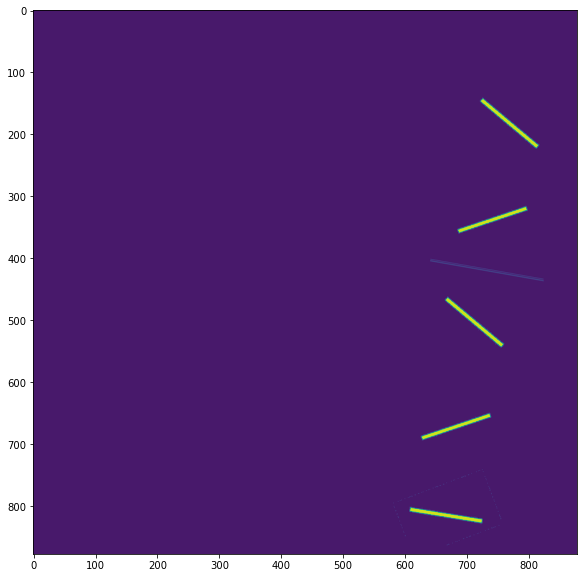

In [80]:
from scipy.ndimage import rotate
rotated_v_el=rotate(img, angle=-100) 
fig = plt.figure(figsize=(10, 10))
plt.imshow(rotated_v_el)

# # Get the dimensions of the matrix and print them
# num_rows = len(rotated_v_el)
# num_cols = len(rotated_v_el[0])
# dimensions = (num_rows, num_cols)
# print(dimensions)
# print(rotated_v_el)

# print(np.linalg.det(rotated_v_el))
# print(np.min(rotated_v_el))

In [81]:
def patch_detect(patch):    
   
    flag = 0
    X = []
    for i in range(patch.shape[0]):
        for j in range(patch.shape[1]):
            if patch[i,j] and not flag:
                flag = 1
                X.append([i, j])
            if patch[i,j:j+1]:
                flag = 0
    return X

C:\Users\aazadkhorasa\AppData\Local\Temp\ipykernel_13052\156005398.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0%}'.format(x) for x in current_values])


[Text(0, 0.0, '0%'),
 Text(0, 0.01, '1%'),
 Text(0, 0.02, '2%'),
 Text(0, 0.03, '3%'),
 Text(0, 0.04, '4%'),
 Text(0, 0.05, '5%'),
 Text(0, 0.06, '6%'),
 Text(0, 0.07, '7%'),
 Text(0, 0.08, '8%')]

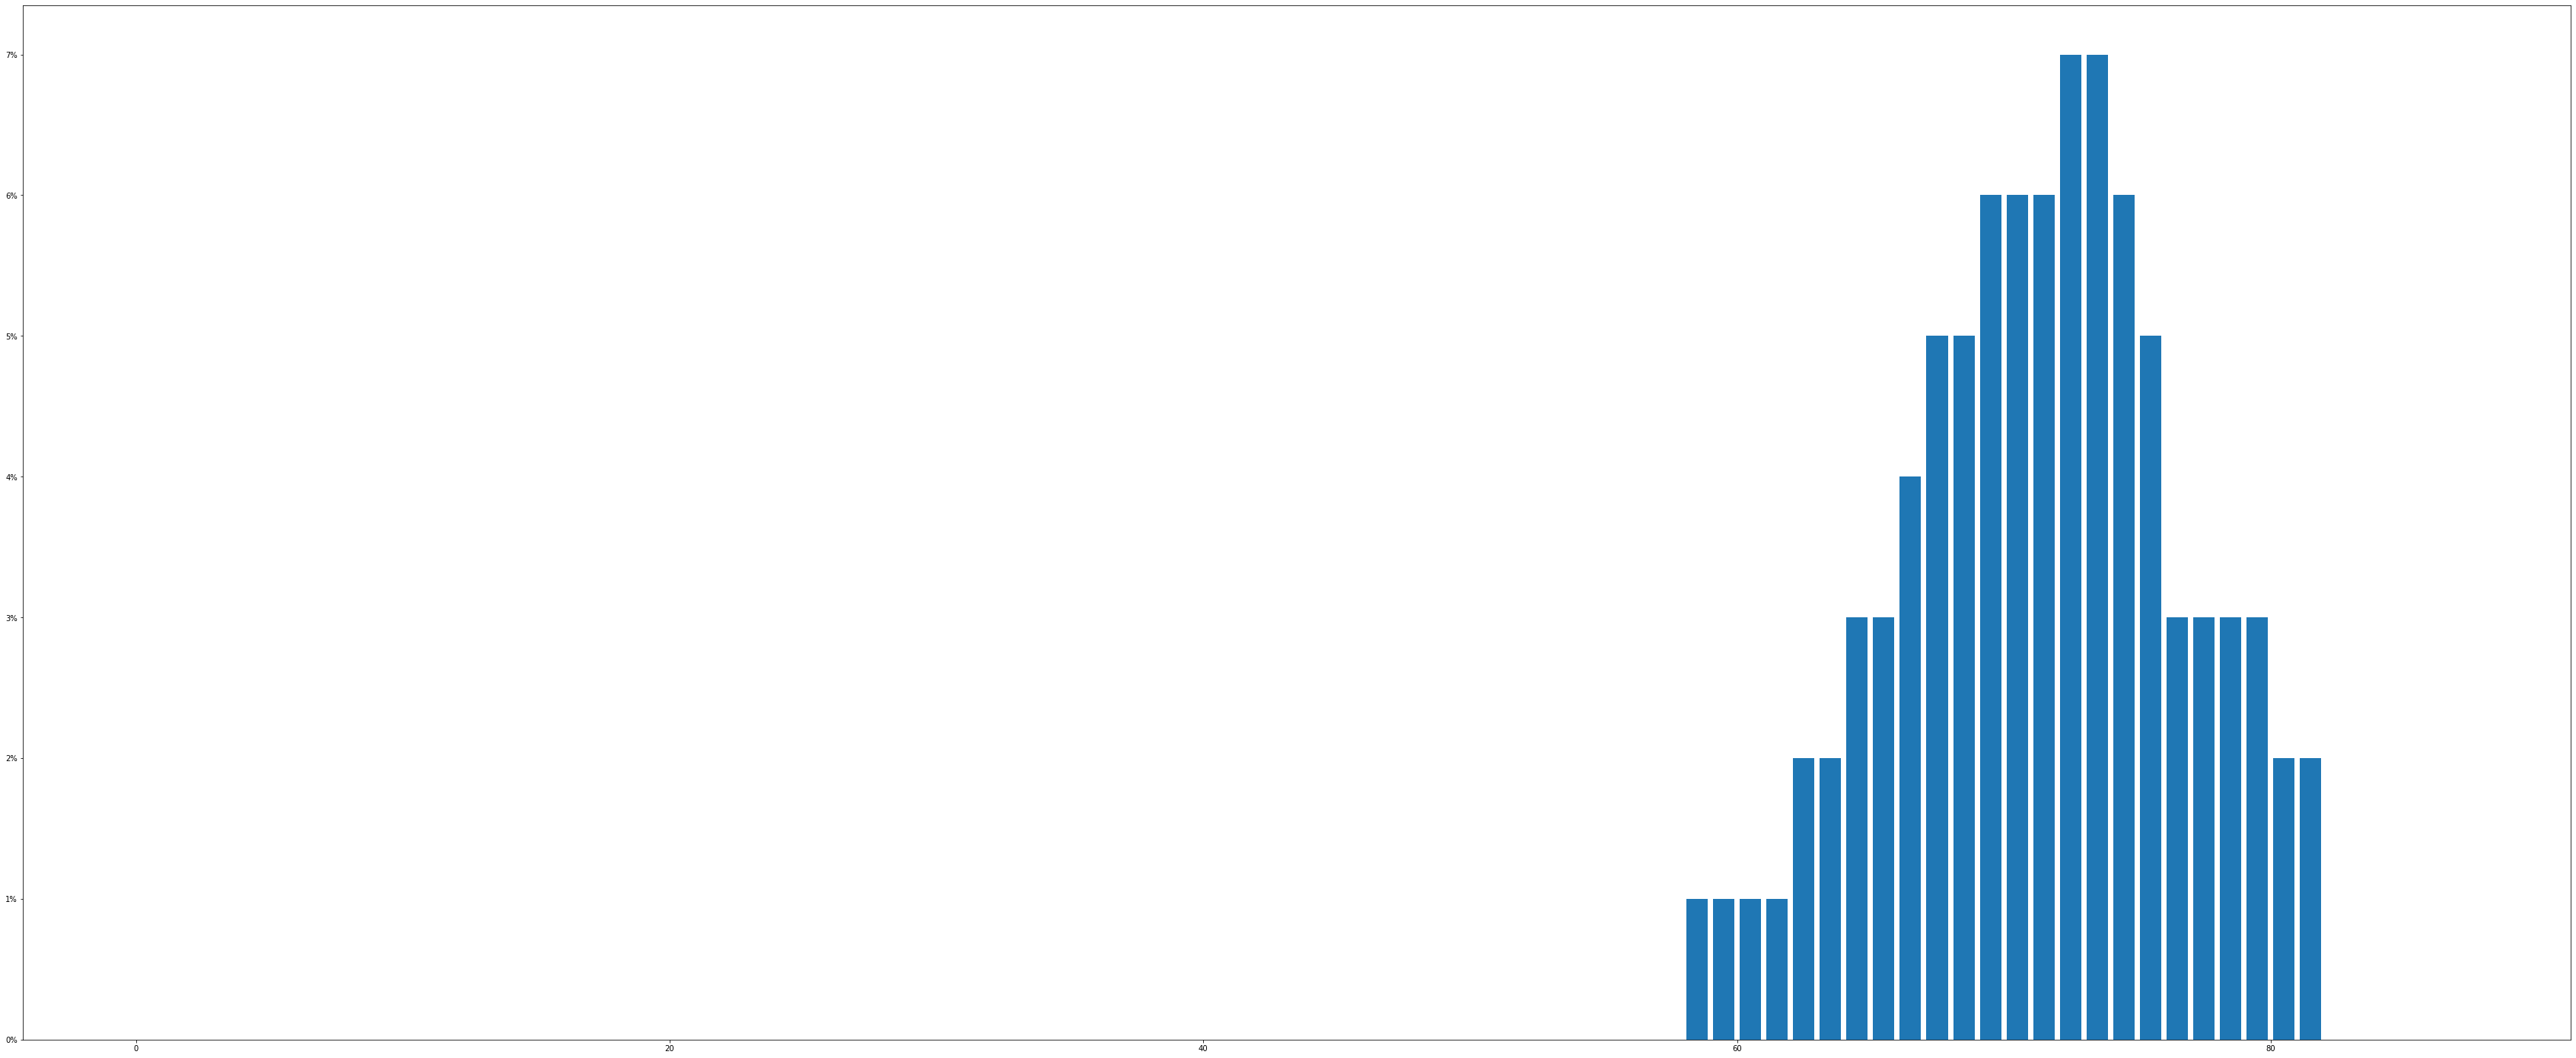

In [83]:
import pandas as pd

data_dict = {'rectangualr number':[],
             'upper':[],
             'lower':[],
             'percenatge':[]}

patch_step = 10
data = []
for i in range(0, rotated_v_el.shape[1]-patch_step+1, patch_step):
    st = list(range(i,i+patch_step))
    th = 0.5
    rect = 1.*(rotated_v_el[:,st]>th)
    X = patch_detect(rect)
    
    percentage = round(np.sum(rect)/(rect.shape[0]*rect.shape[1]), 2)
    if X:
    
        data_dict['rectangualr number'].append(i//patch_step+1)
        data_dict['upper'].append(np.min(np.array(X)[:,0])*8)
        data_dict['lower'].append(np.max(np.array(X)[:,0])*8)
        data_dict['percenatge'].append(percentage)
    
    else:
        data_dict['rectangualr number'].append(i//patch_step+1)
        data_dict['upper'].append(np.NaN)
        data_dict['lower'].append(np.NaN)
        data_dict['percenatge'].append(percentage)
        
df = pd.DataFrame(data=data_dict)

# set figure size
plt.figure(figsize=(60,25))

# plot polar axis
ax = plt.subplot(111)

# remove grid
# plt.axis('o')

bars = plt.bar(df.index+0.5, df['percenatge'])

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:,.0%}'.format(x) for x in current_values])

#rotated_v_el[10:40,70:100]